Import needed libararies

In [120]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

#Evalution
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

Explore data and analyze it


In [121]:
df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


| Column Name     | Description                                                       |
| --------------- | ----------------------------------------------------------------- |
| `battery_power` | Battery capacity in mAh                                           |
| `blue`          | Does the phone support Bluetooth? (1 = Yes, 0 = No)               |
| `clock_speed`   | CPU clock speed in GHz                                            |
| `dual_sim`      | Does the phone support dual SIM? (1 = Yes, 0 = No)                |
| `fc`            | Front camera resolution in megapixels                             |
| `four_g`        | Does the phone support 4G? (1 = Yes, 0 = No)                      |
| `int_memory`    | Internal memory in GB                                             |
| `m_dep`         | Mobile depth in cm                                                |
| `mobile_wt`     | Weight of the mobile phone (in grams)                             |
| `n_cores`       | Number of cores in the processor                                  |
| `pc`            | Primary camera resolution in megapixels                           |
| `px_height`     | Pixel resolution height                                           |
| `px_width`      | Pixel resolution width                                            |
| `ram`           | RAM in MB                                                         |
| `sc_h`          | Screen height in cm                                               |
| `sc_w`          | Screen width in cm                                                |
| `talk_time`     | Battery backup in hours (maximum talk time)                       |
| `three_g`       | Does the phone support 3G? (1 = Yes, 0 = No)                      |
| `touch_screen`  | Does the phone have a touchscreen? (1 = Yes, 0 = No)              |
| `wifi`          | Does the phone support WiFi? (1 = Yes, 0 = No)                    |
| `price_range`   | **Target variable**: 0 (Low), 1 (Medium), 2 (High), 3 (Very High) |


In [122]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [123]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [125]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [126]:
df.duplicated().sum()

np.int64(0)

In [127]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='battery_power', ylabel='price_range'>

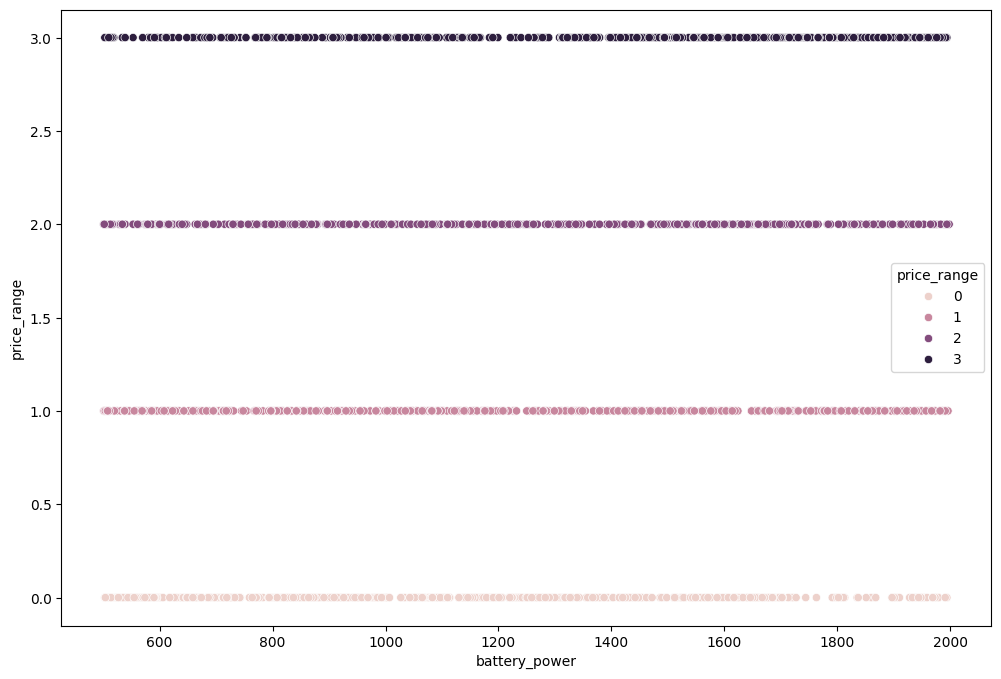

In [128]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="battery_power",y="price_range",hue="price_range")

<Axes: xlabel='px_width', ylabel='px_height'>

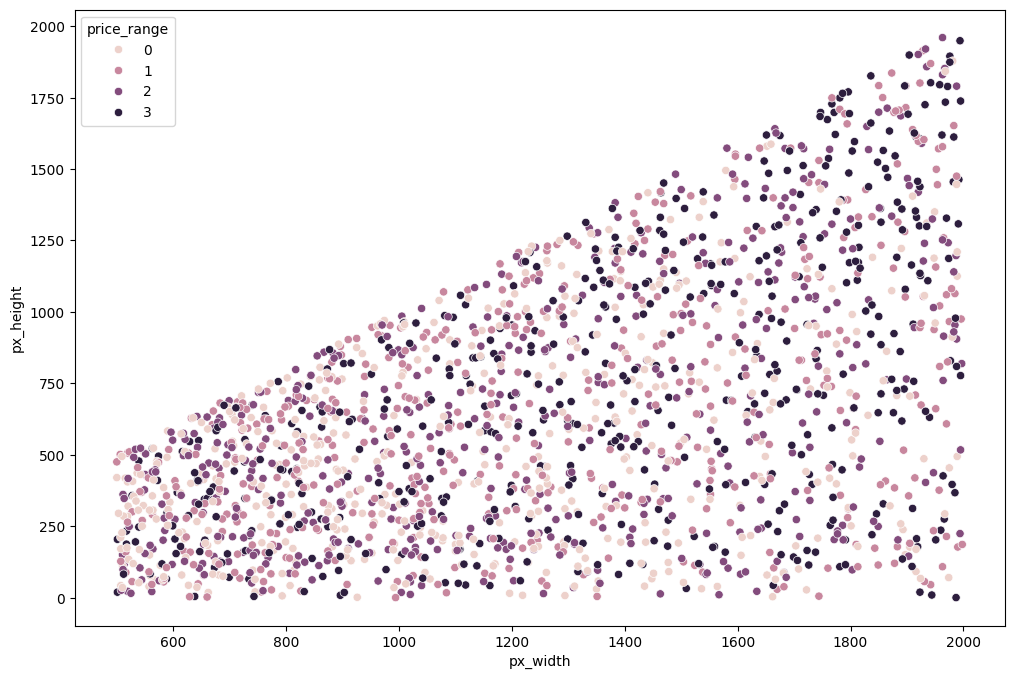

In [129]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="px_width",y="px_height",hue="price_range")

<Axes: xlabel='clock_speed', ylabel='price_range'>

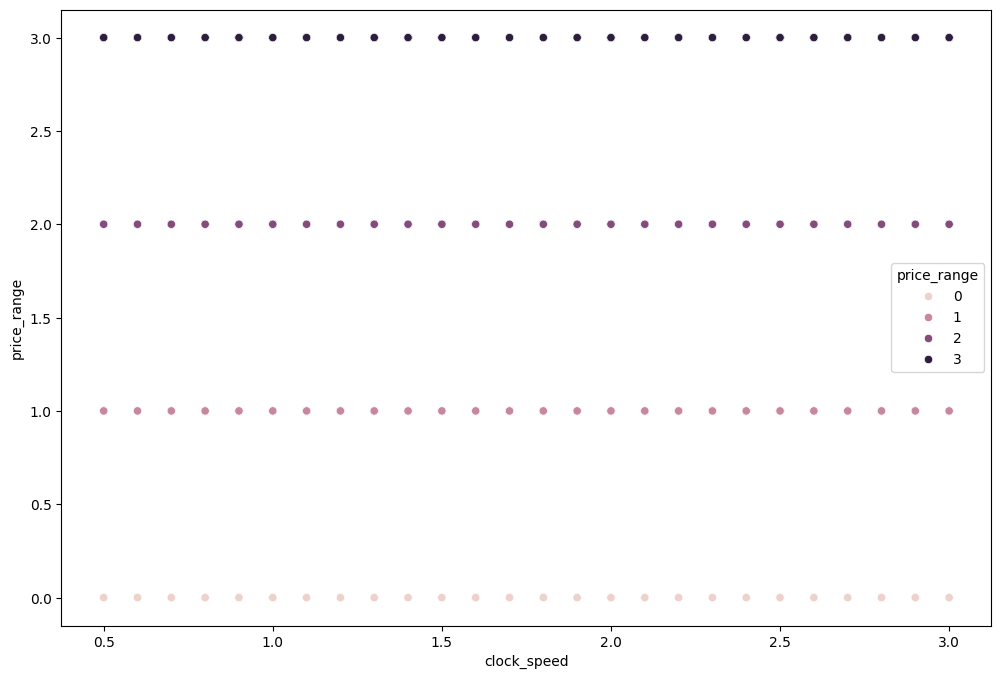

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="clock_speed",y="price_range",hue="price_range")

In [131]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [132]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [133]:
df.pc.describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

In [134]:
df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_39324\2260015883.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "price_range",data=df,palette="viridis");


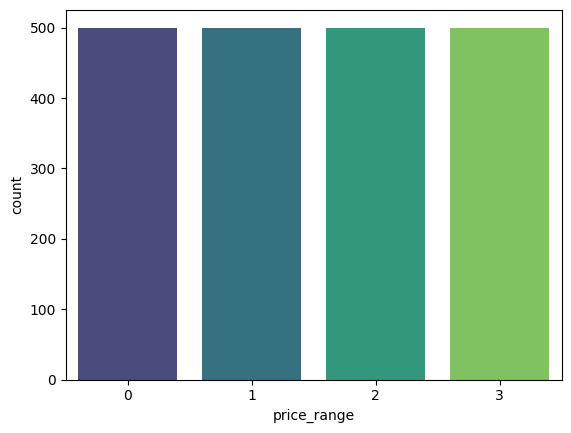

In [ ]:
sns.countplot(x = "price_range",data=df,palette="viridis")

In [136]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [137]:
columns_to_plot = ["battery_power","fc","int_memory","px_height","ram","sc_w"]

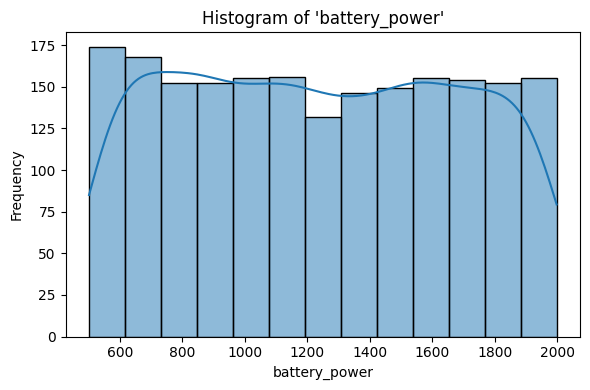

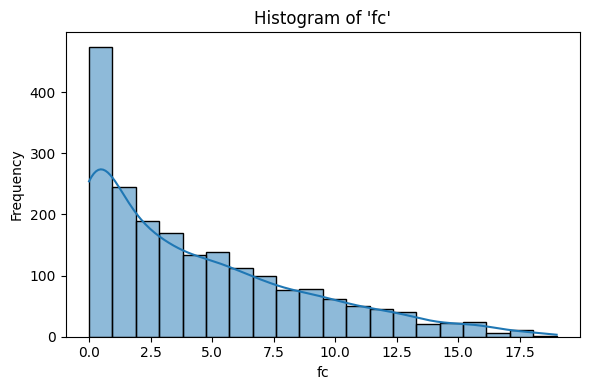

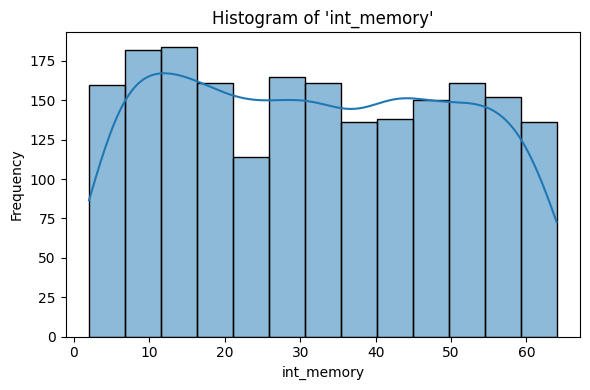

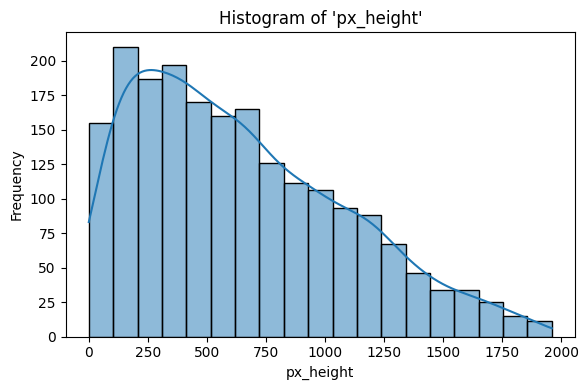

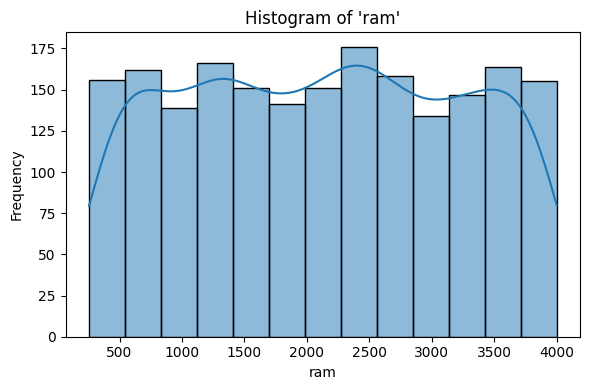

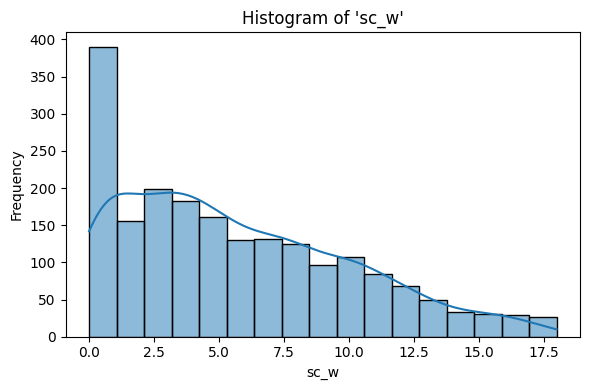

In [138]:
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [139]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<Axes: >

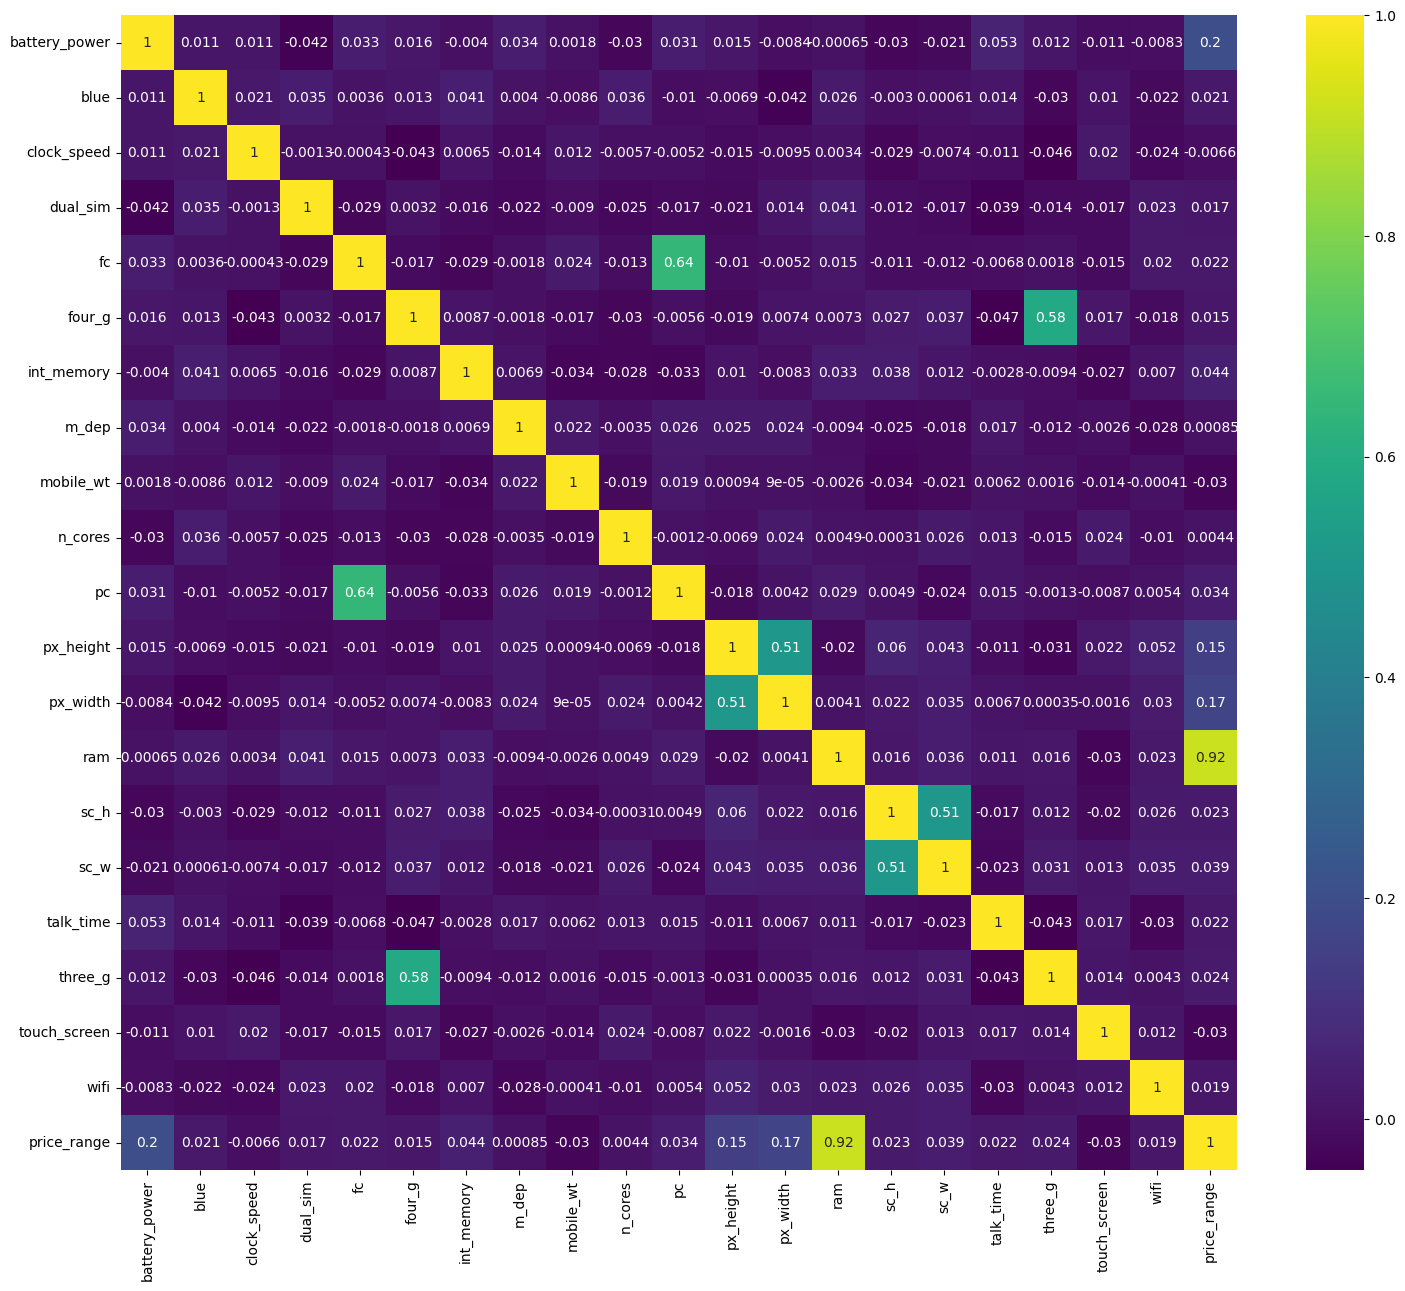

In [140]:
corr = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr,annot=True,cmap="viridis")

Take important columns

In [152]:
threshold = 0.03

high_corr_feature = corr.index[abs(corr["price_range"]) > threshold].tolist()
high_corr_feature.remove("price_range")
print(high_corr_feature)

['battery_power', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'touch_screen']


split data

In [153]:
x = df[high_corr_feature]
y = df["price_range"]

scale and train data


In [154]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.90259726, -1.38064353,  1.34924881, ...,  0.39170341,
         0.2831028 , -1.00601811],
       [-0.49513857,  1.15502422, -0.12005944, ...,  0.46731702,
        -0.63531667,  0.99401789],
       [-1.5376865 ,  0.49354568,  0.13424391, ...,  0.44149774,
        -0.86492153,  0.99401789],
       ...,
       [ 1.53077336,  0.21792962, -0.91122542, ...,  0.86013895,
        -1.0945264 ,  0.99401789],
       [ 0.62252745,  0.76916174,  0.13424391, ..., -1.15745352,
         0.9719174 ,  0.99401789],
       [-1.65833069,  0.71403853,  0.78413025, ...,  1.65500399,
        -0.4057118 ,  0.99401789]], shape=(2000, 9))

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

Logistic regression 

In [156]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [157]:
model.score(x_train,y_train)

0.980625

In [158]:
model.score(x_test,y_test)

0.965

In [159]:
y_pred = model.predict(x_test)

In [160]:
print("Accuarcy" ,accuracy_score(y_test,y_pred))

Accuarcy 0.965


In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.94      0.96      0.95        92
           2       0.95      0.94      0.94        99
           3       0.99      0.97      0.98       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.97       400



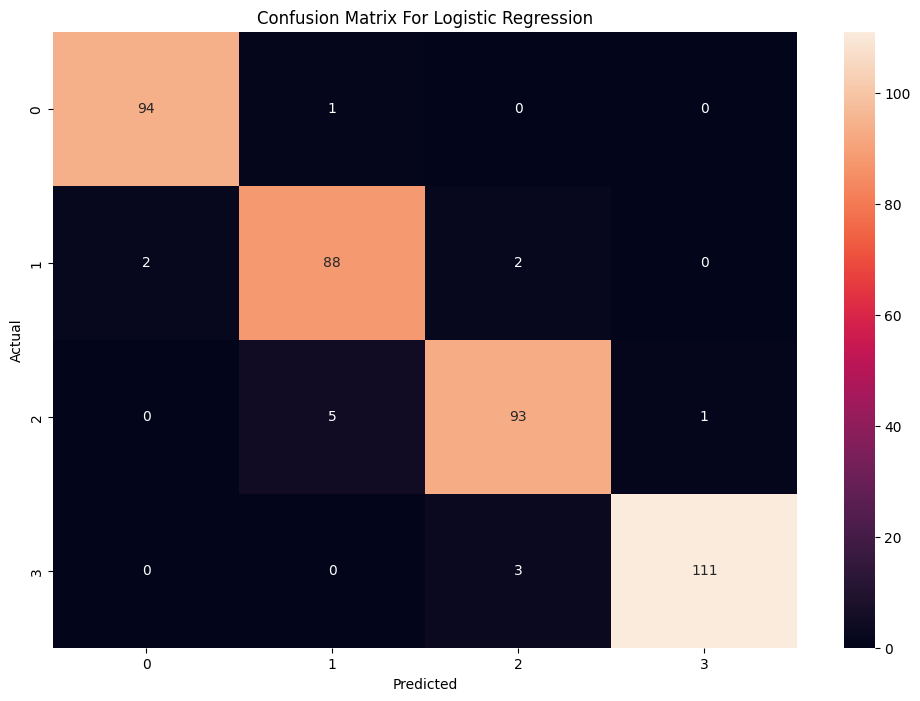

In [162]:
con = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(con, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

SVC model

In [167]:
model2 = SVC()
model2.fit(x_train,y_train)

SVC()

In [168]:
model2.score(x_train,y_train)

0.965625

In [169]:
model2.score(x_test,y_test)

0.9325

SVC with c

In [200]:
model2_c = SVC(C=1)
model2_c.fit(x_train,y_train)

SVC(C=1)

In [201]:
model2_c.score(x_train,y_train)

0.965625

In [202]:
model2_c.score(x_test,y_test)

0.9325

SvC with gamma and kernel

In [212]:
model2_k = SVC(gamma=1 ,kernel="linear")
model2_k.fit(x_train,y_train)

SVC(gamma=1, kernel='linear')

In [213]:
model2_k.score(x_train,y_train)


0.974375

In [214]:
model2_k.score(x_test,y_test)

0.9675

In [215]:
y_pred = model2_k.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       0.95      0.96      0.95        92
           2       0.96      0.93      0.94        99
           3       0.98      0.98      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



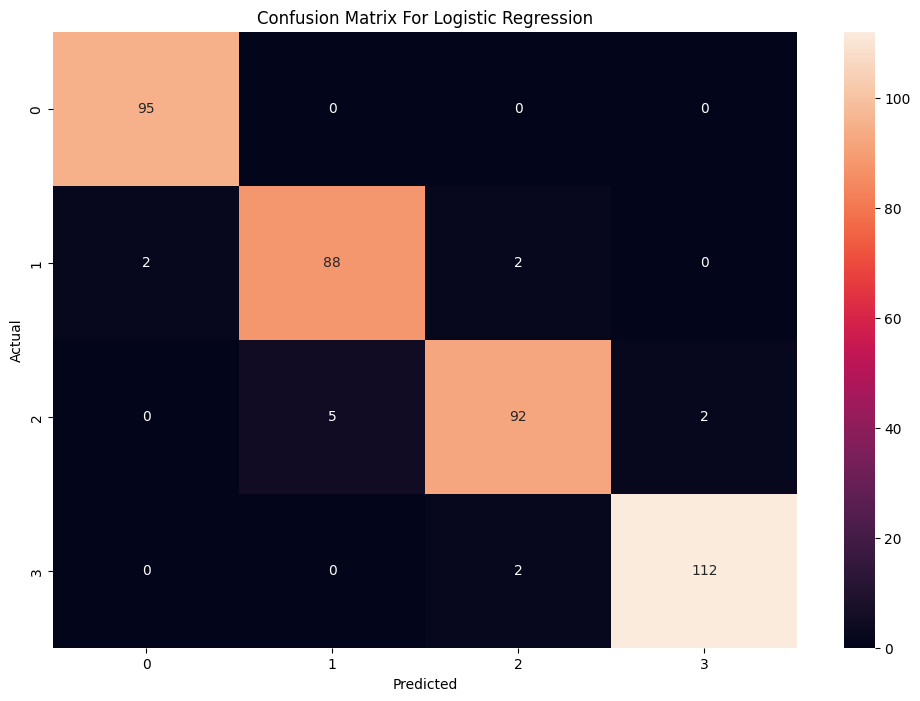

In [216]:
con = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(con, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()